In [311]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from vega_datasets import data

from IPython.display import display, Markdown

# Exercises

In [2]:
sf_temps = data.sf_temps()

In [3]:
# custom plotting settings
title_font = {'family': 'Rockwell',
            'color':  '#1f1e1e',
            'weight': 'bold',
            'size': 20,
            }
axes_fonts = {'family': 'Rockwell',
            'color':  '#1f1e1e',
            'weight': 'bold',
            'size': 20,
            }
favorite_palettes = ['gray_r','RdGy','binary'
                     ,'bone_r','gist_gray_r','gist_yarg','hsv','icefire'
                     ,'icefire_r','rainbow_r','winter_r','Accent','CMRmap_r',]

# Part I:
## Use the above dataset for the following exercises:


# 1. Resample by the day and take the average temperature. Visualize the average temperature over time.

In [4]:
sf_temps.dtypes

temp           float64
date    datetime64[ns]
dtype: object

In [5]:
sf_temps = sf_temps.set_index('date')

In [6]:
sf_temps_average_temperature = sf_temps.resample('D').mean()
data=sf_temps_average_temperature

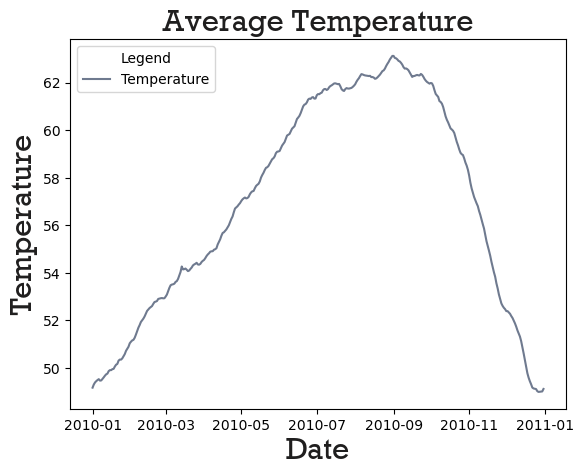

In [7]:
ax = sns.lineplot(data,palette="bone_r",label="Temperature",legend=False)
ax.legend(title='Legend', loc='upper left')
ax.set_ylabel("Temperature",fontdict=axes_fonts)
ax.set_xlabel("Date",fontdict=axes_fonts)
ax.set_title("Average Temperature",fontdict=title_font)
plt.show()

# 2. Write the code necessary to visualize the minimum temperature over time.


In [8]:
sf_temps_minimum_temperature = sf_temps.resample('D').min()
data=sf_temps_minimum_temperature

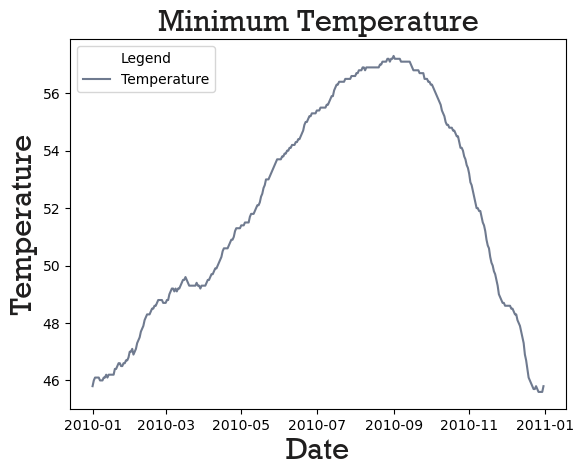

In [9]:
ax = sns.lineplot(data,palette="bone_r",label="Temperature",legend=False)

ax.legend(title='Legend', loc='upper left')
ax.set_ylabel("Temperature",fontdict=axes_fonts)
ax.set_xlabel("Date",fontdict=axes_fonts)
ax.set_title("Minimum Temperature",fontdict=title_font)
plt.show()

# 3. Write the code necessary to visualize the maximum temperature over time.


In [10]:
sf_temps_maximum_temperature = sf_temps.resample('D').max()
data=sf_temps_minimum_temperature

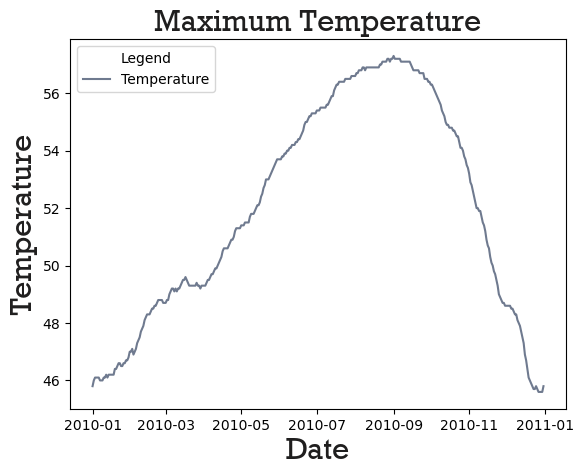

In [11]:
ax = sns.lineplot(data,palette="bone_r",label="Temperature",legend=False)

ax.legend(title='Legend', loc='upper left')
ax.set_ylabel("Temperature",fontdict=axes_fonts)
ax.set_xlabel("Date",fontdict=axes_fonts)
ax.set_title("Maximum Temperature",fontdict=title_font)
plt.show()

# 4. Which month is the coldest, on average?


In [12]:
sf_temps_coldest_month_temperature = sf_temps.resample('M').max()
data=sf_temps_coldest_month_temperature

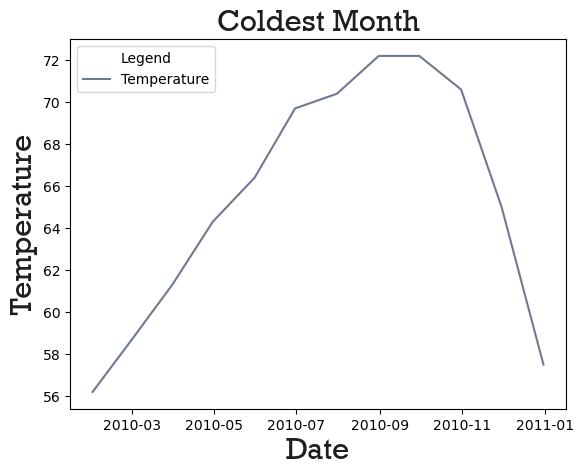

In [13]:
ax = sns.lineplot(data,palette="bone_r",label="Temperature",legend=False)

ax.legend(title='Legend', loc='upper left')
ax.set_ylabel("Temperature",fontdict=axes_fonts)
ax.set_xlabel("Date",fontdict=axes_fonts)
ax.set_title("Coldest Month",fontdict=title_font)
plt.show()

In [14]:
sf_temps_coldest_month_temperature = sf_temps.resample('M').max()
sf_temps_coldest_month_name = sf_temps_coldest_month_temperature.idxmax().dt.month_name()
display(Markdown(f"# `coldest_month = {sf_temps_coldest_month_name[0]}`"))

# `coldest_month = August`

# 5. Which month has the highest average temperature?


In [15]:
sf_temps_coldest_average_month_temperature = sf_temps.resample('M').mean()
data=sf_temps_coldest_average_month_temperature

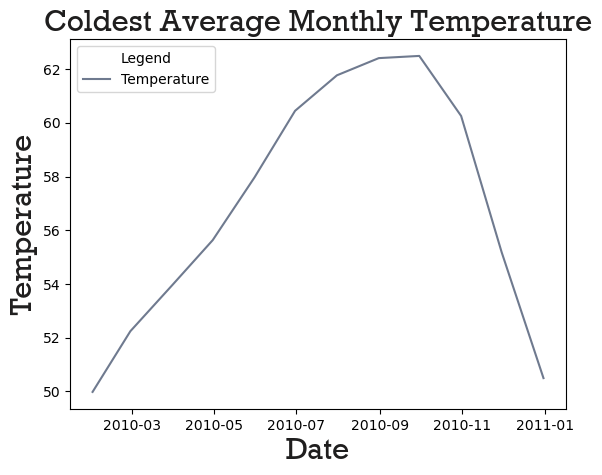

In [16]:
ax = sns.lineplot(data,palette="bone_r",label="Temperature",legend=False)

ax.legend(title='Legend', loc='upper left')
ax.set_ylabel("Temperature",fontdict=axes_fonts)
ax.set_xlabel("Date",fontdict=axes_fonts)
ax.set_title("Coldest Average Monthly Temperature",fontdict=title_font)
plt.show()

In [17]:
sf_temps_coldest_average_month_temperature = sf_temps.resample('M').mean()
coldest_average_month = sf_temps_coldest_average_month_temperature.idxmax().dt.month_name()[0]

In [18]:
display(Markdown(f"# `coldest_average_month = {coldest_average_month}`"))

# `coldest_average_month = September`

# 6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?


In [19]:
sf_temps_daily_min_temp = sf_temps.resample('D').min()
sf_temps_daily_max_temp = sf_temps.resample('D').max()

In [21]:
sf_temps_daily_variance = pd.DataFrame()

In [22]:
sf_temps_daily_variance["min"]=sf_temps_daily_min_temp
sf_temps_daily_variance["max"]=sf_temps_daily_max_temp

In [24]:
sf_temps_daily_variance["variance"]=sf_temps_daily_variance["max"]-sf_temps_daily_variance["min"]

In [36]:
sf_temps_daily_variance.head(1)

,min,max,variance
date,,,
2010-01-01,45.8,53.3,7.5


In [31]:
data = sf_temps_daily_variance["variance"]

/var/folders/_r/wftd7dk93nj_hbzpqfw4vnsr0000gn/T/ipykernel_63740/24872022.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(data,palette="bone_r",label="Temperature",legend=False)


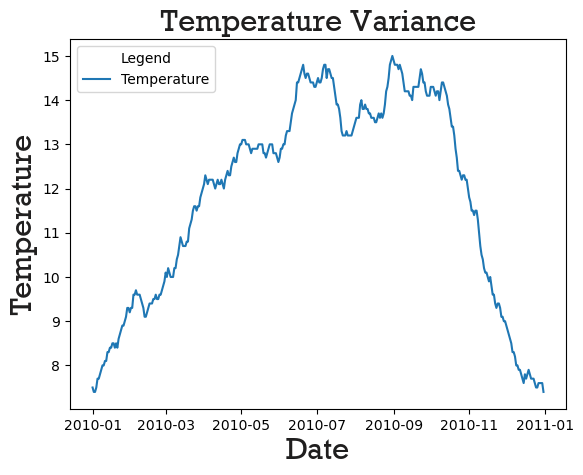

In [32]:
ax = sns.lineplot(data,palette="bone_r",label="Temperature",legend=False)

ax.legend(title='Legend', loc='upper left')
ax.set_ylabel("Temperature",fontdict=axes_fonts)
ax.set_xlabel("Date",fontdict=axes_fonts)
ax.set_title("Temperature Variance",fontdict=title_font)
plt.show()

# 7. Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

In [37]:
data = sf_temps_daily_variance

In [38]:
data["average"] = sf_temps.resample('D').mean()

In [40]:
data.head(1)

,min,max,variance,average
date,,,,
2010-01-01,45.8,53.3,7.5,49.170833


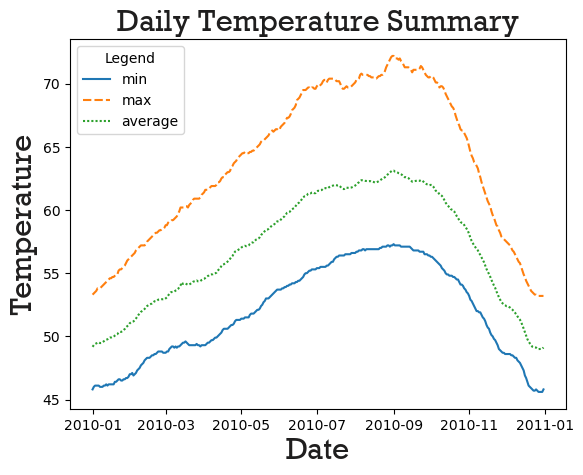

In [42]:
ax = sns.lineplot(data[['min','max','average']])

ax.legend(title='Legend', loc='upper left')
ax.set_ylabel("Temperature",fontdict=axes_fonts)
ax.set_xlabel("Date",fontdict=axes_fonts)
ax.set_title("Daily Temperature Summary",fontdict=title_font)
plt.show()

<hr style="border:2px solid gray">

# Seattle Weather

In [115]:
seattle_weather_df = data.seattle_weather()

# Part II:
#### Use the above dataset for the following exercises:

# 1. Which year and month combination has the highest amount of precipitation?

In [116]:
# Convert the date column to a datetime object
seattle_weather_df['date'] = pd.to_datetime(seattle_weather_df['date'])

In [117]:
seattle_weather_df.head(1)

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle


In [118]:
# create combo using the year and month from the date column
seattle_weather_df['year_month'] = seattle_weather_df['date'].dt.to_period("M")

In [119]:
seattle_weather_df.head(1)

,date,precipitation,temp_max,temp_min,wind,weather,year_month
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,2012-01


In [120]:
# Group the DataFrame by the combo 'year_month' column
grouped = seattle_weather_df.groupby('year_month').sum()

In [121]:
grouped.head(3)

,precipitation,temp_max,temp_min,wind
year_month,,,,
2012-01,173.3,218.7,47.8,120.9
2012-02,92.3,269.0,92.9,113.2
2012-03,183.0,296.2,88.0,131.7


In [122]:
# Find the year and month with the highest precipitation
max_precipitation = grouped['precipitation'].idxmax().strftime('%Y-%m')

In [123]:
display(Markdown(f"# `Max Precipitation Combo = {max_precipitation}`"))

# `Max Precipitation Combo = 2015-12`

# 2. Visualize the amount of monthly precipitation over time.

In [124]:
# Convert the date column to a datetime object
seattle_weather_df['date'] = pd.to_datetime(seattle_weather_df['date'])

In [125]:
seattle_weather_df = seattle_weather_df.set_index('date')

In [126]:
seattle_weather_df.head(1)

,precipitation,temp_max,temp_min,wind,weather,year_month
date,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,2012-01


In [136]:
seattle_weather_df_monthly_precipitation = seattle_weather_df["precipitation"].resample('M').max()

In [138]:
seattle_weather_df_monthly_precipitation=pd.DataFrame(seattle_weather_df_monthly_precipitation)

In [139]:
data = seattle_weather_df_monthly_precipitation

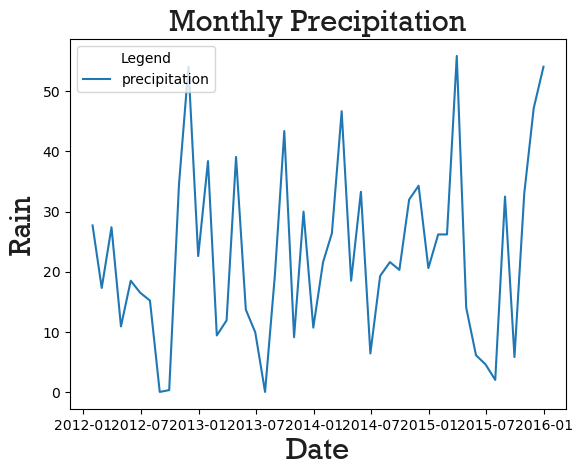

In [143]:
ax = sns.lineplot(data = data)

ax.legend(title='Legend', loc='upper left')
ax.set_ylabel("Rain",fontdict=axes_fonts)
ax.set_xlabel("Date",fontdict=axes_fonts)
ax.set_title("Monthly Precipitation",fontdict=title_font)
plt.show()

# 3. Visualize the amount of wind over time. Choose a time interval you think is appropriate.

In [165]:
seattle_weather_df_monthly_max_wind = seattle_weather_df["wind"].resample('M').max()

In [166]:
data = seattle_weather_df_monthly_max_wind

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


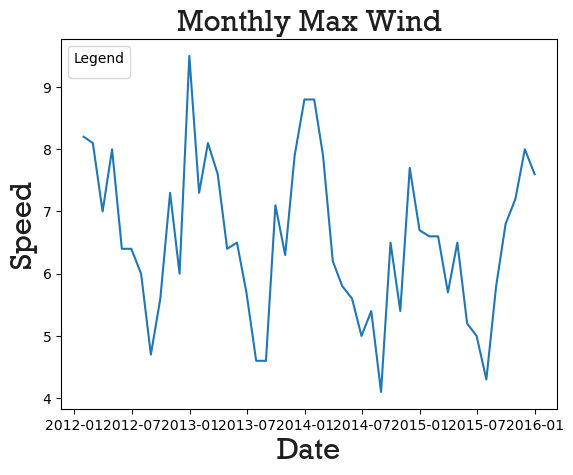

In [168]:
ax = sns.lineplot(data = data)

ax.legend(title='Legend', loc='upper left')
ax.set_ylabel("Speed",fontdict=axes_fonts)
ax.set_xlabel("Date",fontdict=axes_fonts)
ax.set_title("Monthly Max Wind",fontdict=title_font)
plt.show()

# 4. Which year-month combination is the windiest?

In [178]:
windiest_month_combo = seattle_weather_df_monthly_max_wind.idxmax().strftime('%Y-%m')

In [179]:
display(Markdown(f"# `windiest_month_combo = {windiest_month_combo}`"))

# `windiest_month_combo = 2012-12`

# 5. What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

In [186]:
seattle_weather_df.isnull().sum()

precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
year_month       0
dtype: int64

In [197]:
seattle_weather_df.head(1)

,precipitation,temp_max,temp_min,wind,weather,year_month
date,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,2012-01


In [187]:
seattle_weather_df_sunny_weather = seattle_weather_df[seattle_weather_df["weather"]=="sun"]

In [204]:
seattle_weather_df_sunny_weather["year"]=seattle_weather_df_sunny_weather.index.strftime('%Y')

/var/folders/_r/wftd7dk93nj_hbzpqfw4vnsr0000gn/T/ipykernel_63740/2436714263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seattle_weather_df_sunny_weather["year"]=seattle_weather_df_sunny_weather.index.strftime('%Y')


In [208]:
sunny_days = seattle_weather_df_sunny_weather.groupby('year').max()

In [221]:
sunniest_year = sunny_days.sort_values("wind",ascending=False).head(1)

In [229]:
print((sunniest_year.index)[0])

2014


In [230]:
windiest_year = (sunniest_year.index)[0]

In [231]:
display(Markdown(f"# `windiest_year = {windiest_year}`"))

# `windiest_year = 2014`

# 6. In which month does it rain the most?

In [ ]:
# group by year then extract max month.sum()

In [287]:
seattle_weather_df.head()

,precipitation,temp_max,temp_min,wind,weather,year_month,month,year
date,,,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,2012-01,01,2012
2012-01-02,10.9,10.6,2.8,4.5,rain,2012-01,01,2012
2012-01-03,0.8,11.7,7.2,2.3,rain,2012-01,01,2012
2012-01-04,20.3,12.2,5.6,4.7,rain,2012-01,01,2012
2012-01-05,1.3,8.9,2.8,6.1,rain,2012-01,01,2012


In [283]:
seattle_weather_df_rainiest_month = seattle_weather_df.groupby("month").sum().sort_values("precipitation",ascending=False).head(1)

In [284]:
rainiest_month = rainiest_month.index

In [285]:
rainiest_month[0]

'11'

# 7. Which month has the most number of days with a non-zero amount of precipitation?

In [307]:
frequently_rainy_months = seattle_weather_df[seattle_weather_df["precipitation"]>0].groupby("month").count().sort_values("precipitation",ascending=False).index[0]

In [308]:
frequently_rainy_months

'12'

<hr style="border:2px solid gray">

# Flights

In [312]:
flights_20k_df = data.flights_20k()

# Part III:
#### Use the above dataset for the following exercises:

# 1. Convert any negative delays to 0.

In [321]:
flights_20k_df[flights_20k_df['delay']<0]["delay"] = 0

/var/folders/_r/wftd7dk93nj_hbzpqfw4vnsr0000gn/T/ipykernel_63740/220624821.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flights_20k_df[flights_20k_df['delay']<0]["delay"] = 0


In [322]:
flights_20k_df

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND
...,...,...,...,...,...
19995,2001-03-22 15:10:00,4,446,SAN,OAK
19996,2001-01-19 13:05:00,-6,1489,SEA,MCI
19997,2001-02-07 11:37:00,-16,1848,MCO,PHX
19998,2001-02-24 16:50:00,42,443,RDU,BNA


# 2. Which hour of the day has the highest average delay?

# 3. Does the day of the week make a difference in the delay amount?

# 4. Does the month make a difference in the delay amount?

<hr style="border:2px solid gray">

# Iowa Electricity

In [ ]:
iowa_electricity_df = data.iowa_electricity()

# BONUS
# Part I.
### Use the above dataset for the following exercises:

# 1. For each row, calculate the percentage of the year's total that energy source provided.

# 2. Lineplot of generation over time, color by source

# 3. Display the data as table where years are columns, and energy source is rows (Hint: df.pivot_table)

# 4. Make a line plot that shows the amount of energy generated over time. Each source should be a separate line?

# 5. Is the total generation increasing over time?

#    a. How would you control for increasing consumption over time when considering how much energy is coming from each source?

#    b. express each number as a % of the year's total

# Part II:
### Explore the birdstrikes dataset